In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Liverp.csv', encoding='ISO-8859-1')


In [3]:
df

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
30686,50.0,Male,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30687,55.0,Male,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
30688,54.0,Male,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1
30689,48.0,Female,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1


In [4]:
df.isnull().sum()

Age of the patient                        2
Gender of the patient                   902
Total Bilirubin                         648
Direct Bilirubin                        561
 Alkphos Alkaline Phosphotase           796
 Sgpt Alamine Aminotransferase          538
Sgot Aspartate Aminotransferase         462
Total Protiens                          463
 ALB Albumin                            494
A/G Ratio Albumin and Globulin Ratio    559
Result                                    0
dtype: int64

In [5]:
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)

Index(['Gender of the patient'], dtype='object')


In [6]:

df['Gender of the patient'] = df['Gender of the patient'].fillna('Unknown')


In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Gender of the patient'] = label_encoder.fit_transform(df['Gender of the patient'])

gender_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Gender of the patient Mapping:", gender_mapping)



Gender of the patient Mapping: {'Female': 0, 'Male': 1, 'Unknown': 2}


In [8]:
df

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,1,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,1,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,1,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,1,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
30686,50.0,1,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,1
30687,55.0,1,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,1
30688,54.0,1,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,1
30689,48.0,0,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,1


In [9]:
import pandas as pd
from scipy.stats import shapiro, normaltest

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns


for col in numeric_columns:
    print(f"Testing normality for column: {col}")

    shapiro_stat, shapiro_p = shapiro(df[col].dropna())
    print(f"Shapiro-Wilk Test p-value: {shapiro_p:.5f}")
    if shapiro_p < 0.05:
        print(f"{col}: Shapiro-Wilk Test indicates non-normal distribution.\n")
    else:
        print(f"{col}: Shapiro-Wilk Test suggests normal distribution.\n")

    dagostino_stat, dagostino_p = normaltest(df[col].dropna())
    print(f"D’Agostino’s K-squared Test p-value: {dagostino_p:.5f}")
    if dagostino_p < 0.05:
        print(f"{col}: D’Agostino’s Test indicates non-normal distribution.\n")
    else:
        print(f"{col}: D’Agostino’s Test suggests normal distribution.\n")

    print("-" * 50)


Testing normality for column: Age of the patient
Shapiro-Wilk Test p-value: 0.00000
Age of the patient: Shapiro-Wilk Test indicates non-normal distribution.

D’Agostino’s K-squared Test p-value: 0.00000
Age of the patient: D’Agostino’s Test indicates non-normal distribution.

--------------------------------------------------
Testing normality for column: Total Bilirubin
Shapiro-Wilk Test p-value: 0.00000
Total Bilirubin: Shapiro-Wilk Test indicates non-normal distribution.

D’Agostino’s K-squared Test p-value: 0.00000
Total Bilirubin: D’Agostino’s Test indicates non-normal distribution.

--------------------------------------------------
Testing normality for column: Direct Bilirubin
Shapiro-Wilk Test p-value: 0.00000
Direct Bilirubin: Shapiro-Wilk Test indicates non-normal distribution.

D’Agostino’s K-squared Test p-value: 0.00000
Direct Bilirubin: D’Agostino’s Test indicates non-normal distribution.

--------------------------------------------------
Testing normality for column:  

C:\Users\SOHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30689.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\SOHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30043.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\SOHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30130.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\SOHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 29895.
  res =

In [10]:
import pandas as pd


def remove_outliers_iqr(df, target_column='Result'):

    df_cleaned = df.copy()


    Q1 = df_cleaned.quantile(0.25)
    Q3 = df_cleaned.quantile(0.75)


    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    for column in df_cleaned.columns:
        if column != target_column:
            df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound[column]) & (df_cleaned[column] <= upper_bound[column])]

    return df_cleaned


df = remove_outliers_iqr(df, target_column='Result')


print(df.shape)


(18877, 11)


In [11]:
df.isnull().sum()

Age of the patient                      0
Gender of the patient                   0
Total Bilirubin                         0
Direct Bilirubin                        0
 Alkphos Alkaline Phosphotase           0
 Sgpt Alamine Aminotransferase          0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
 ALB Albumin                            0
A/G Ratio Albumin and Globulin Ratio    0
Result                                  0
dtype: int64

In [12]:
df.fillna(df.mean(), inplace=True)

In [13]:
df['Result'] = df['Result'].replace({1: 0, 2: 1})

In [14]:
from scipy.stats import f_oneway


target = 'Result'
features = df.columns.difference([target])


significance_threshold = 0.05


anova_results = {}
for feature in features:

    groups = [df[feature][df[target] == category] for category in df[target].unique()]


    f_stat, p_val = f_oneway(*groups)
    anova_results[feature] = {'F-statistic': f_stat, 'p-value': p_val, 'significant': p_val < significance_threshold}

for feature, stats in anova_results.items():
    significance = "significant" if stats['significant'] else "not significant"
    print(f"Feature: {feature}, F-statistic: {stats['F-statistic']:.4f}, p-value: {stats['p-value']:.4e} - {significance}")


Feature: A/G Ratio Albumin and Globulin Ratio, F-statistic: 245.2761, p-value: 6.1691e-55 - significant
Feature: Age of the patient, F-statistic: 1.3005, p-value: 2.5414e-01 - not significant
Feature: Direct Bilirubin, F-statistic: 651.5210, p-value: 2.5859e-141 - significant
Feature: Gender of the patient, F-statistic: 0.0507, p-value: 8.2192e-01 - not significant
Feature: Sgot Aspartate Aminotransferase, F-statistic: 426.1424, p-value: 1.2147e-93 - significant
Feature: Total Bilirubin, F-statistic: 604.5387, p-value: 2.0039e-131 - significant
Feature: Total Protiens, F-statistic: 3.7831, p-value: 5.1788e-02 - not significant
Feature:  ALB Albumin, F-statistic: 193.4909, p-value: 9.0464e-44 - significant
Feature:  Alkphos Alkaline Phosphotase, F-statistic: 493.9976, p-value: 4.6699e-108 - significant
Feature:  Sgpt Alamine Aminotransferase, F-statistic: 314.2568, p-value: 9.4918e-70 - significant


In [15]:
df = df.drop(columns=['Total Protiens', 'Gender of the patient', 'Age of the patient'])


In [ ]:

print(df.columns)


Index(['Total Bilirubin', 'Direct Bilirubin', ' Alkphos Alkaline Phosphotase',
       ' Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', ' ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio', 'Result'],
      dtype='object')


In [ ]:
df.head(5)

,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.9,0
3,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.0,0
4,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.4,0
5,1.8,0.7,208.0,19.0,14.0,7.6,4.4,1.3,0
7,0.9,0.3,202.0,14.0,11.0,6.7,3.6,1.1,0


In [ ]:
from sklearn.preprocessing import StandardScaler


columns_to_standardize = df.columns[df.columns != 'Result']


scaler = StandardScaler()


df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])



In [ ]:
from sklearn.model_selection import train_test_split


train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


print(f"Training set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")


Training set shape: (15101, 9)
Test set shape: (3776, 9)


In [ ]:

train_result_counts = train_df['Result'].value_counts()
test_result_counts = test_df['Result'].value_counts()

print("Value counts of 'Result' in train_df:")
print(train_result_counts)

print("\nValue counts of 'Result' in test_df:")
print(test_result_counts)


Value counts of 'Result' in train_df:
Result
0    9321
1    5780
Name: count, dtype: int64

Value counts of 'Result' in test_df:
Result
0    2362
1    1414
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split


X_train = train_df.drop(columns=['Result'])
y_train = train_df['Result']

ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


train_df_resampled = X_resampled.copy()
train_df_resampled['Result'] = y_resampled

print(y_resampled.value_counts())


Result
0    9321
1    9321
Name: count, dtype: int64


In [ ]:
from sklearn.neighbors import KNeighborsClassifier  


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np


param_grids = {
    'DecisionTree': {
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 5, 10],
        'criterion': ['gini', 'entropy']
    },
    'ExtraTrees': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 10, 20, 50, 100],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 5, 10],
        'criterion': ['gini', 'entropy']
    },
    'LogisticRegression': {
        'C': [0.01, 0.1, 1, 2, 3, 4, 5],
        'penalty': ['l2'],
        'solver': ['lbfgs'],
        'max_iter': [3000, 5000, 10000],
        'class_weight': ['balanced']
    }
}


models = {
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'ExtraTrees': ExtraTreesClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42)
}


best_models = {}
best_params = {}


for model_name in models:
    print(f"\nPerforming grid search for {model_name}...")

    
    grid_search = GridSearchCV(
        estimator=models[model_name],
        param_grid=param_grids[model_name],
        scoring='accuracy',  
        cv=5,                
        n_jobs=-1            
    )

  
    grid_search.fit(X_train_resampled, y_train_resampled)

    
    best_models[model_name] = grid_search.best_estimator_
    best_params[model_name] = grid_search.best_params_

    # Output results
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best CV Score for {model_name}: {grid_search.best_score_:.4f}")
    print("="*80)

print("\nSummary of Best Models and Parameters:")
for model_name in best_models:
    print(f"{model_name}: Best Params - {best_params[model_name]}, Best CV Score - {grid_search.best_score_:.4f}")

if 'ExtraTrees' in best_models:
    et_model = best_models['ExtraTrees']
    feature_importances = et_model.feature_importances_

    
    feature_importance_dict = dict(zip(X_train_resampled.columns, feature_importances))

    print("\nFeature Importances for the Best Extra Trees Model (using criterion='gini' or 'entropy'):")
    for feature, importance in sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True):
        print(f"{feature}: {importance:.4f}")



Performing grid search for DecisionTree...
Best Parameters for DecisionTree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Score for DecisionTree: 0.9019

Performing grid search for ExtraTrees...
Best Parameters for ExtraTrees: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best CV Score for ExtraTrees: 0.9999

Performing grid search for LogisticRegression...
Best Parameters for LogisticRegression: {'C': 2, 'class_weight': 'balanced', 'max_iter': 3000, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV Score for LogisticRegression: 0.6449

Summary of Best Models and Parameters:
DecisionTree: Best Params - {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}, Best CV Score - 0.6449
ExtraTrees: Best Params - {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}, Best CV Score - 0.6449
LogisticRegression: 

**ERGERG**

In [ ]:
import warnings
import time
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import classification_report, accuracy_score

warnings.filterwarnings('ignore', category=UserWarning, message='No further splits with positive gain, best gain: -inf')


X_train_resampled = train_df_resampled.drop(columns=['Result'])
y_train_resampled = train_df_resampled['Result']

models = [
    DecisionTreeClassifier(
        criterion='gini',
        max_depth=10,
        min_samples_leaf=1,
        min_samples_split=2,
        random_state=42
    ),
    ExtraTreesClassifier(
        criterion='gini',
        max_depth=20,
        min_samples_leaf=1,
        min_samples_split=2,
        n_estimators=50,
        random_state=42
    ),
    xgb.XGBClassifier(
        n_estimators=100,
        max_depth=5,
        learning_rate=0.1,
        objective='binary:logistic',
        random_state=42
    ),
    lgb.LGBMClassifier(
        n_estimators=100,
        max_depth=5,
        learning_rate=0.1,
        objective='binary',
        random_state=42,
        min_split_gain=0.01,
        feature_fraction=0.8,
        bagging_fraction=0.8,
        min_data_in_leaf=20
    ),
    RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=10,
        class_weight='balanced',
        random_state=42
    ),
    KNeighborsClassifier(n_neighbors=5),
    MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42), 
    SVC(
        probability=True,
        random_state=42,
        C=4,
        class_weight='balanced',
        kernel='rbf',
        gamma='scale'
    ),
    VotingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, class_weight='balanced', random_state=42)),
            ('knn', KNeighborsClassifier(n_neighbors=5)),
            ('svc', SVC(probability=True, random_state=42, C=4, class_weight='balanced', kernel='rbf', gamma='scale'))
        ],
        voting='soft'
    )
]


for model in models:
    try:
        start_time = time.time()

        model.fit(X_train_resampled, y_train_resampled)

        end_time = time.time()
        training_time = end_time - start_time

        y_train_pred = model.predict(X_train_resampled)
        train_classification_report = classification_report(y_train_resampled, y_train_pred)
        accuracy = accuracy_score(y_train_resampled, y_train_pred)

        print(f"Training Time for {model.__class__.__name__}: {training_time:.4f} seconds")
        print(f"Accuracy for {model.__class__.__name__} on Training Set: {accuracy:.4f}")
        print(f"Classification Report for {model.__class__.__name__} on Training Set:")
        print(train_classification_report)
        print("=" * 80)

    except Exception as e:
        print(f"Error training {model.__class__.__name__}: {e}")


Training Time for DecisionTreeClassifier: 0.0284 seconds
Accuracy for DecisionTreeClassifier on Training Set: 0.8945
Classification Report for DecisionTreeClassifier on Training Set:
              precision    recall  f1-score   support

           0       0.98      0.81      0.88      9321
           1       0.84      0.98      0.90      9321

    accuracy                           0.89     18642
   macro avg       0.91      0.89      0.89     18642
weighted avg       0.91      0.89      0.89     18642

Training Time for ExtraTreesClassifier: 0.3087 seconds
Accuracy for ExtraTreesClassifier on Training Set: 0.9999
Classification Report for ExtraTreesClassifier on Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9321
           1       1.00      1.00      1.00      9321

    accuracy                           1.00     18642
   macro avg       1.00      1.00      1.00     18642
weighted avg       1.00      1.00      1.

**10 FOLD CV**

In [ ]:
import warnings
import time
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

warnings.filterwarnings('ignore', category=UserWarning, message='No further splits with positive gain')


X_train_resampled = train_df_resampled.drop(columns=['Result'])
y_train_resampled = train_df_resampled['Result']


models = [
    DecisionTreeClassifier(
        criterion='gini',
        max_depth=10,
        min_samples_leaf=1,
        min_samples_split=2,
        random_state=42
    ),
    ExtraTreesClassifier(
        n_estimators=50,
        criterion='gini',
        max_depth=20,
        min_samples_leaf=1,
        min_samples_split=2,
        random_state=42
    ),
    xgb.XGBClassifier(
        n_estimators=100,
        max_depth=5,
        learning_rate=0.1,
        objective='binary:logistic',
        random_state=42
    ),
    lgb.LGBMClassifier(
        n_estimators=100,
        max_depth=5,
        learning_rate=0.1,
        objective='binary',
        random_state=42,
        min_split_gain=0.01,
        feature_fraction=0.8,
        bagging_fraction=0.8,
        min_data_in_leaf=20
    ),
    RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=10,
        class_weight='balanced',
        random_state=42
    ),
    KNeighborsClassifier(n_neighbors=5),
    MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    SVC(
        probability=True,
        random_state=42,
        C=4,
        class_weight=None,
        kernel='rbf',
        gamma='scale'
    ),
    VotingClassifier(
        estimators=[
            ('dt', DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=1, min_samples_split=2, random_state=42)),
            ('et', ExtraTreesClassifier(n_estimators=50, criterion='gini', max_depth=20, min_samples_leaf=1, min_samples_split=2, random_state=42)),
            ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, class_weight='balanced', random_state=42))
        ],
        voting='soft'
    )
]


kf = KFold(n_splits=10, shuffle=True, random_state=42)


for model in models:
    try:
        start_time = time.time()

        
        cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=kf, scoring='accuracy')

        end_time = time.time()

        training_time = end_time - start_time
        mean_cv_accuracy = np.mean(cv_scores)
        std_cv_accuracy = np.std(cv_scores)

        # Print results
        print(f"Training Time for {model.__class__.__name__}: {training_time:.4f} seconds")
        print(f"Mean CV Accuracy for {model.__class__.__name__}: {mean_cv_accuracy:.4f}")
        print(f"CV Accuracy Std Dev for {model.__class__.__name__}: {std_cv_accuracy:.4f}")
        print("=" * 80)

    except Exception as e:
        print(f"Error training {model.__class__.__name__}: {e}")


Training Time for DecisionTreeClassifier: 0.2410 seconds
Mean CV Accuracy for DecisionTreeClassifier: 0.8896
CV Accuracy Std Dev for DecisionTreeClassifier: 0.0138
Training Time for ExtraTreesClassifier: 2.5932 seconds
Mean CV Accuracy for ExtraTreesClassifier: 0.9999
CV Accuracy Std Dev for ExtraTreesClassifier: 0.0002
Training Time for XGBClassifier: 0.7392 seconds
Mean CV Accuracy for XGBClassifier: 0.9959
CV Accuracy Std Dev for XGBClassifier: 0.0022
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current val

C:\Users\SOHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\SOHAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Time for MLPClassifier: 517.8049 seconds
Mean CV Accuracy for MLPClassifier: 0.9998
CV Accuracy Std Dev for MLPClassifier: 0.0003
Training Time for SVC: 550.8020 seconds
Mean CV Accuracy for SVC: 0.8897
CV Accuracy Std Dev for SVC: 0.0047
Training Time for VotingClassifier: 13.8861 seconds
Mean CV Accuracy for VotingClassifier: 0.9999
CV Accuracy Std Dev for VotingClassifier: 0.0002


Accuracy for XGBClassifier on Test Set: 0.9928
Classification Report for XGBClassifier on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2362
           1       0.98      1.00      0.99      1414

    accuracy                           0.99      3776
   macro avg       0.99      0.99      0.99      3776
weighted avg       0.99      0.99      0.99      3776

AUC for XGBClassifier: 0.9999


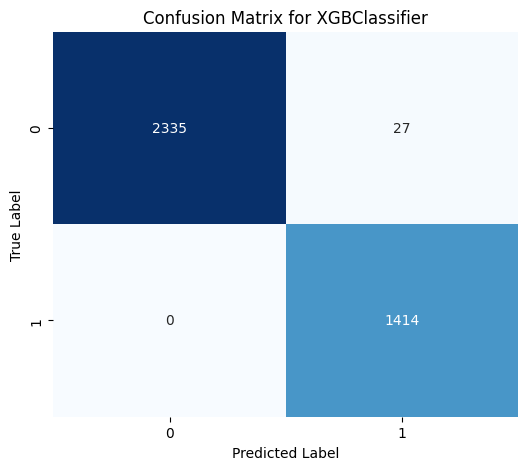

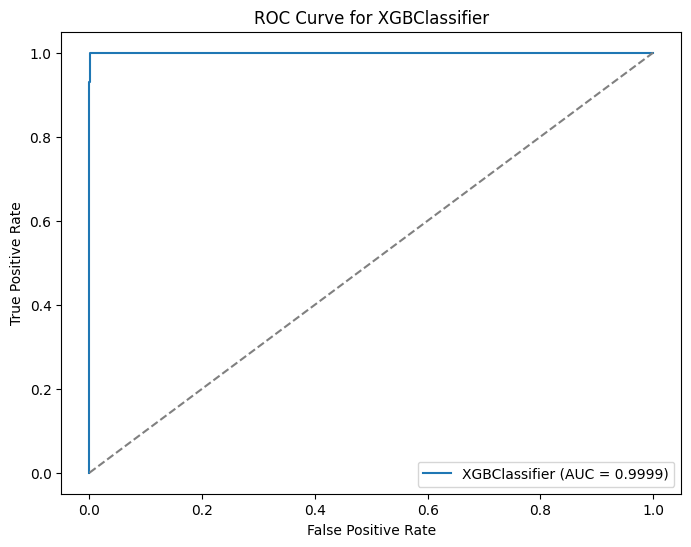

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Info] Number of positive: 9321, number of negative: 9321
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001375 seconds.
You can set `force_co

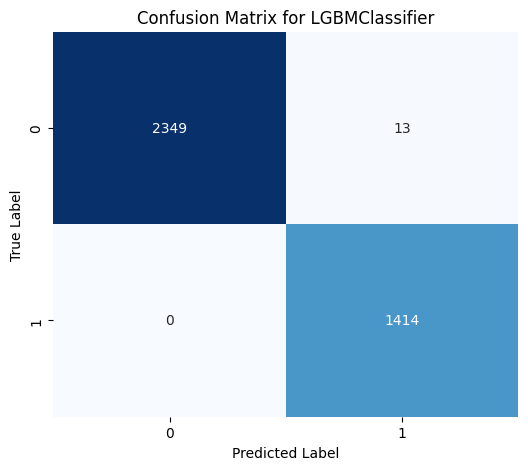

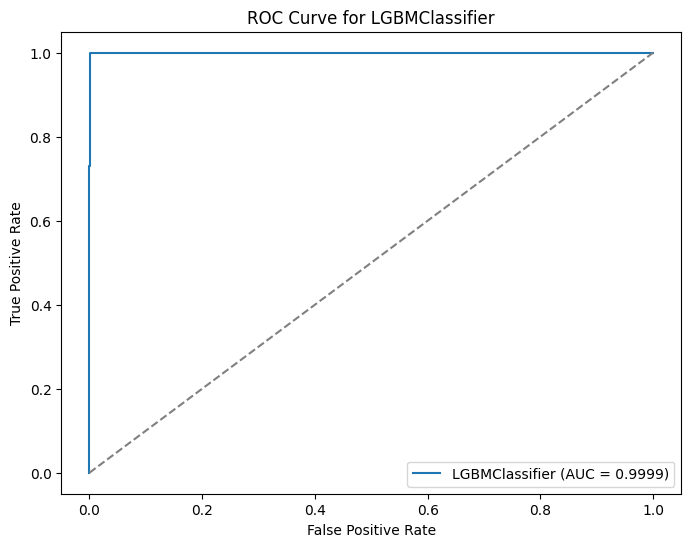

Accuracy for RandomForestClassifier on Test Set: 0.9664
Classification Report for RandomForestClassifier on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      2362
           1       0.92      1.00      0.96      1414

    accuracy                           0.97      3776
   macro avg       0.96      0.97      0.96      3776
weighted avg       0.97      0.97      0.97      3776

AUC for RandomForestClassifier: 1.0000


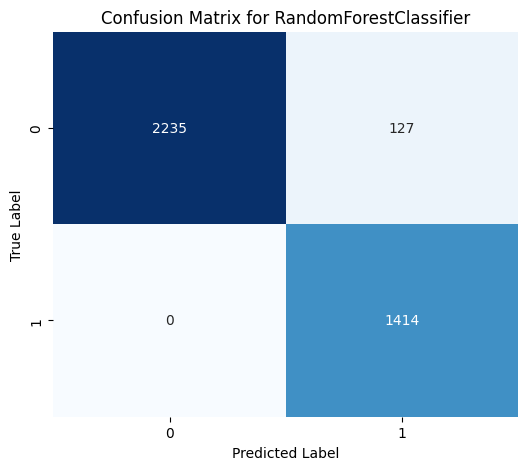

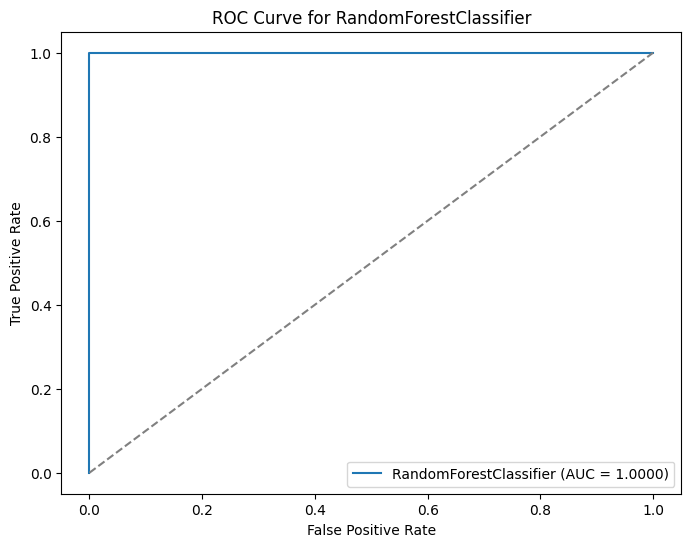

Accuracy for KNeighborsClassifier on Test Set: 0.9992
Classification Report for KNeighborsClassifier on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2362
           1       1.00      1.00      1.00      1414

    accuracy                           1.00      3776
   macro avg       1.00      1.00      1.00      3776
weighted avg       1.00      1.00      1.00      3776

AUC for KNeighborsClassifier: 0.9994


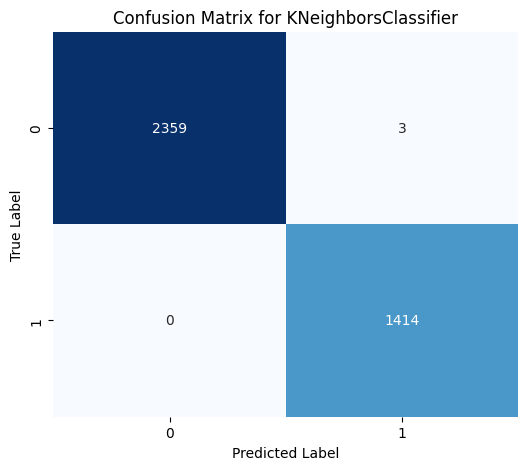

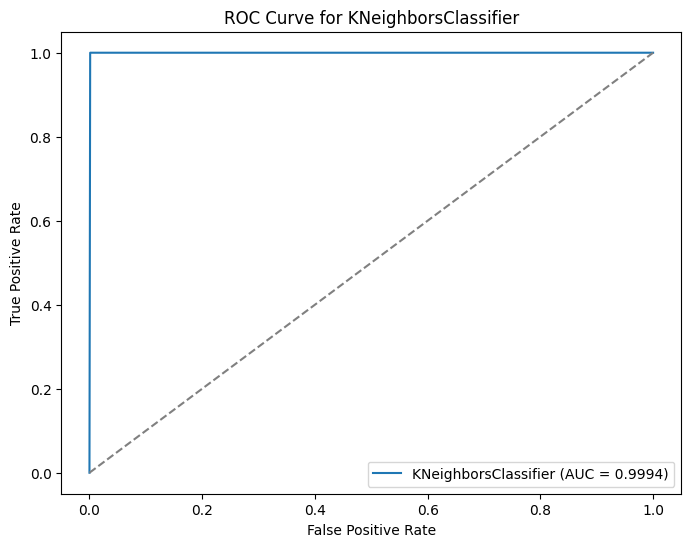

Accuracy for MLPClassifier on Test Set: 0.9992
Classification Report for MLPClassifier on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2362
           1       1.00      1.00      1.00      1414

    accuracy                           1.00      3776
   macro avg       1.00      1.00      1.00      3776
weighted avg       1.00      1.00      1.00      3776

AUC for MLPClassifier: 0.9992


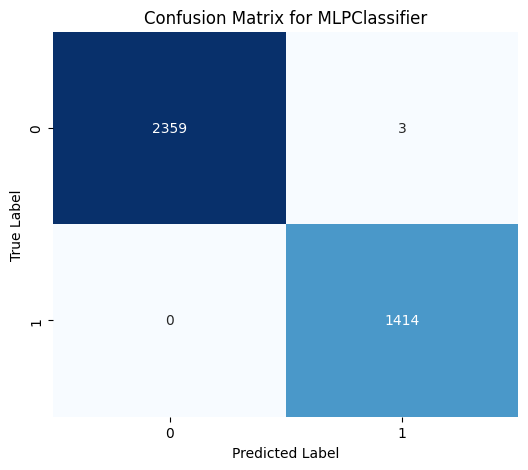

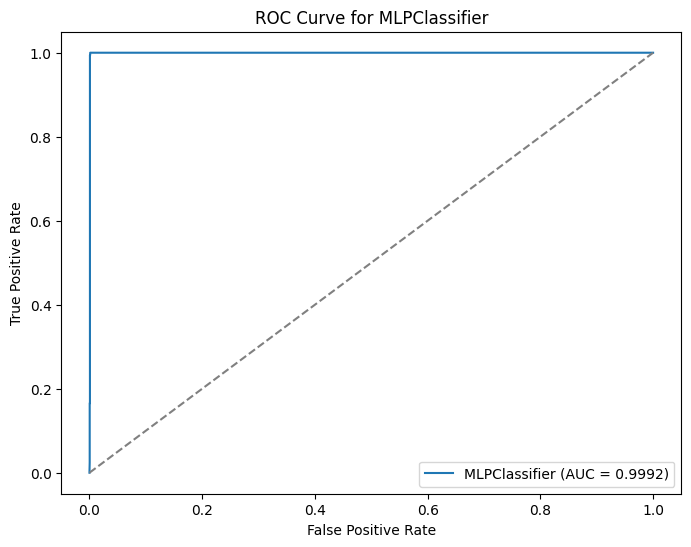

Accuracy for SVC on Test Set: 0.8769
Classification Report for SVC on Test Set:
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      2362
           1       0.76      0.98      0.86      1414

    accuracy                           0.88      3776
   macro avg       0.87      0.90      0.87      3776
weighted avg       0.90      0.88      0.88      3776

AUC for SVC: 0.9278


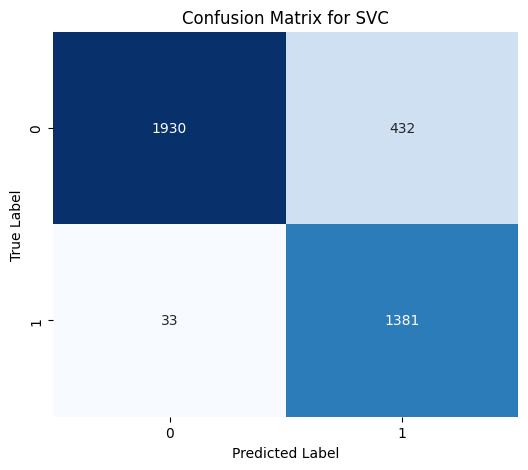

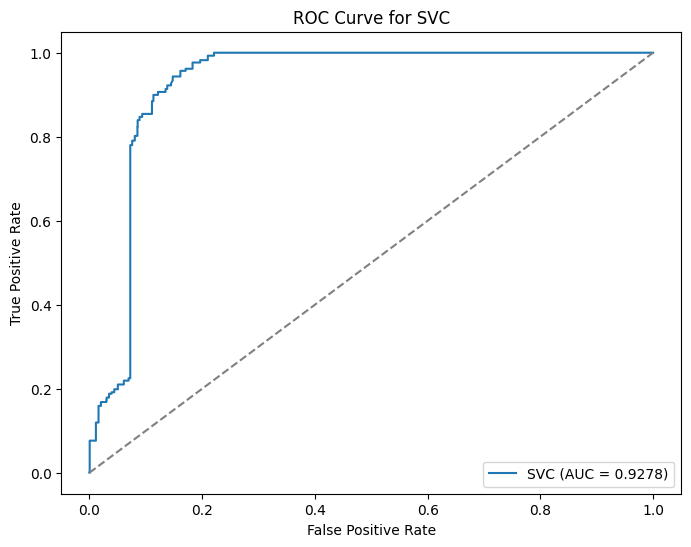

Accuracy for VotingClassifier on Test Set: 0.9963
Classification Report for VotingClassifier on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2362
           1       0.99      1.00      1.00      1414

    accuracy                           1.00      3776
   macro avg       1.00      1.00      1.00      3776
weighted avg       1.00      1.00      1.00      3776

AUC for VotingClassifier: 0.9998


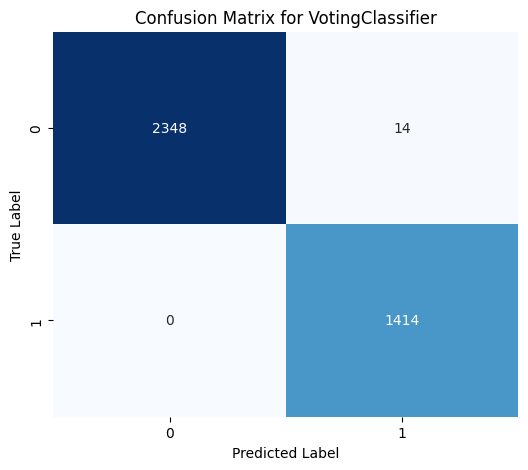

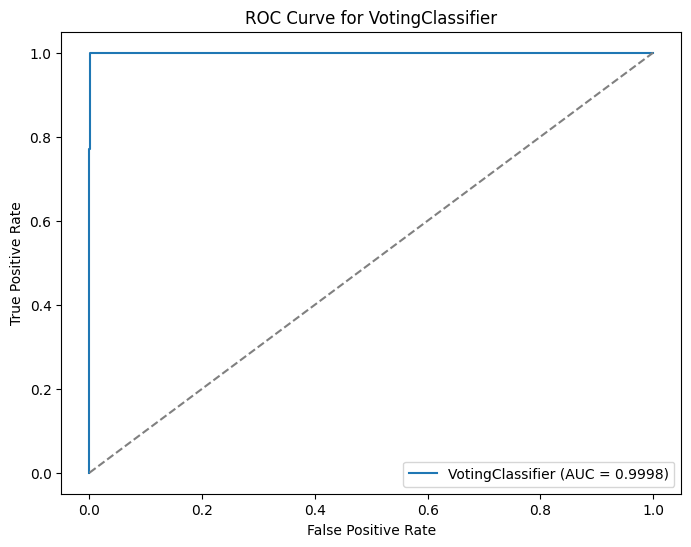

In [ ]:
import warnings
import time
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore', category=UserWarning, message='No further splits with positive gain')


X_test = test_df.drop(columns=['Result'])
y_test = test_df['Result']


models = [
    xgb.XGBClassifier(
        n_estimators=100,
        max_depth=5,
        learning_rate=0.1,
        objective='binary:logistic',
        random_state=42
    ),
    lgb.LGBMClassifier(
        n_estimators=100,
        max_depth=5,
        learning_rate=0.1,
        objective='binary',
        random_state=42,
        min_split_gain=0.01,
        feature_fraction=0.8,
        bagging_fraction=0.8,
        min_data_in_leaf=20
    ),
    RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=10,
        class_weight='balanced',
        random_state=42
    ),
    KNeighborsClassifier(n_neighbors=5),
    MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    SVC(
        probability=True,
        random_state=42,
        C=4,
        class_weight='balanced',
        kernel='rbf',
        gamma='scale'
    ),
    VotingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, class_weight='balanced', random_state=42)),
            ('knn', KNeighborsClassifier(n_neighbors=5)),
            ('svc', SVC(probability=True, random_state=42, C=4, class_weight='balanced', kernel='rbf', gamma='scale'))
        ],
        voting='soft'
    )
]


for model in models:
    try:
        model.fit(X_train_resampled, y_train_resampled)

   
        y_test_pred = model.predict(X_test)
        y_test_prob = model.predict_proba(X_test)[:, 1]

        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_classification_report = classification_report(y_test, y_test_pred)
        cm = confusion_matrix(y_test, y_test_pred)
        fpr, tpr, _ = roc_curve(y_test, y_test_prob)
        auc_value = auc(fpr, tpr)

        
        print(f"Accuracy for {model.__class__.__name__} on Test Set: {test_accuracy:.4f}")
        print(f"Classification Report for {model.__class__.__name__} on Test Set:")
        print(test_classification_report)
        print(f"AUC for {model.__class__.__name__}: {auc_value:.4f}")
        print("=" * 80)

     
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
        plt.title(f"Confusion Matrix for {model.__class__.__name__}")
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.show()

    
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f"{model.__class__.__name__} (AUC = {auc_value:.4f})")
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve for {model.__class__.__name__}")
        plt.legend(loc="lower right")
        plt.show()

    except Exception as e:
        print(f"Error during testing {model.__class__.__name__}: {e}")


Accuracy for XGBClassifier on Test Set: 0.9928
Cohen's Kappa for XGBClassifier: 0.9848
MCC for XGBClassifier: 0.9849
Brier Score for XGBClassifier: 0.0242
AUC for XGBClassifier: 0.9999
Classification Report for XGBClassifier on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2362
           1       0.98      1.00      0.99      1414

    accuracy                           0.99      3776
   macro avg       0.99      0.99      0.99      3776
weighted avg       0.99      0.99      0.99      3776



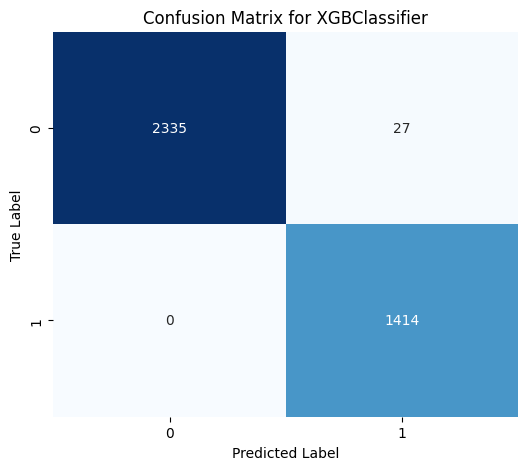

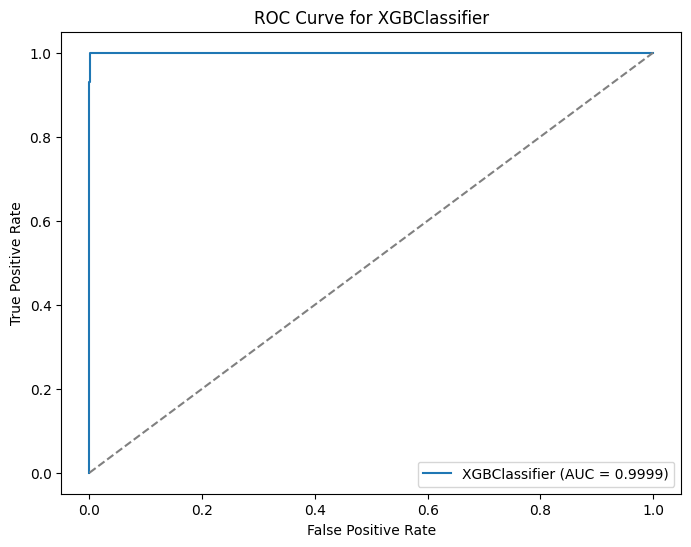

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Info] Number of positive: 9321, number of negative: 9321
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000533 seconds.
You can set `force_co

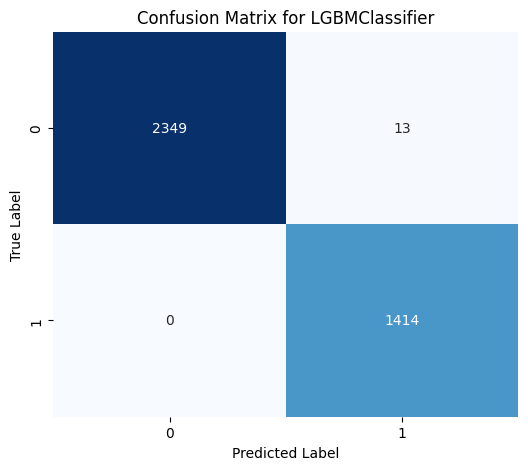

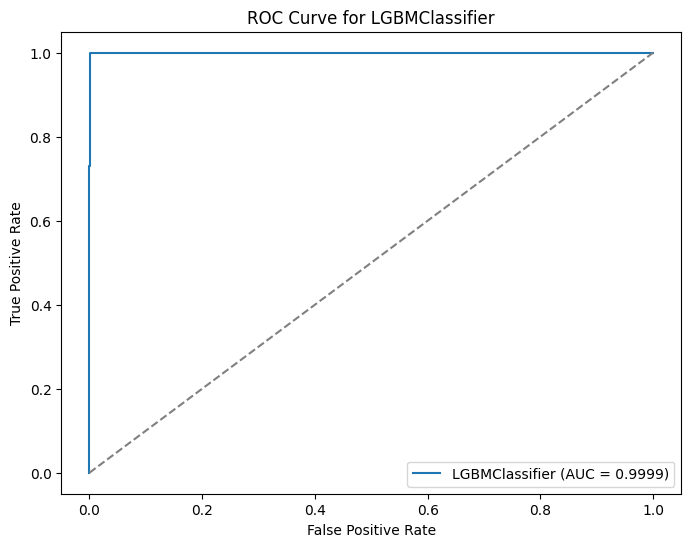

Accuracy for RandomForestClassifier on Test Set: 0.9664
Cohen's Kappa for RandomForestClassifier: 0.9295
MCC for RandomForestClassifier: 0.9318
Brier Score for RandomForestClassifier: 0.0492
AUC for RandomForestClassifier: 1.0000
Classification Report for RandomForestClassifier on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      2362
           1       0.92      1.00      0.96      1414

    accuracy                           0.97      3776
   macro avg       0.96      0.97      0.96      3776
weighted avg       0.97      0.97      0.97      3776



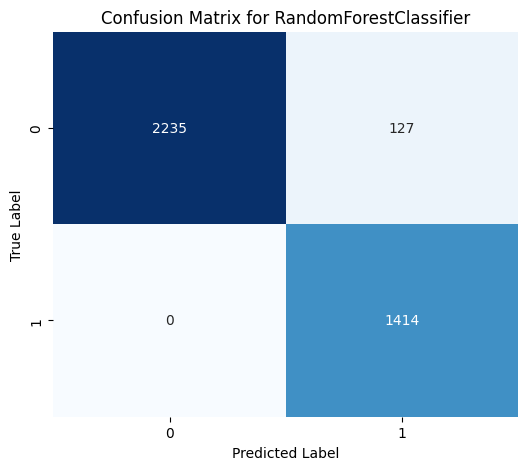

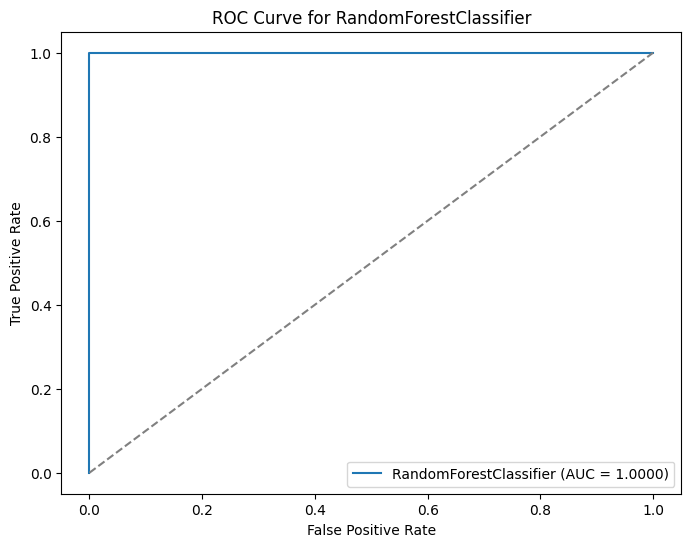

Accuracy for ExtraTreesClassifier on Test Set: 0.8877
Cohen's Kappa for ExtraTreesClassifier: 0.7739
MCC for ExtraTreesClassifier: 0.7945
Brier Score for ExtraTreesClassifier: 0.1167
AUC for ExtraTreesClassifier: 0.9980
Classification Report for ExtraTreesClassifier on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90      2362
           1       0.77      1.00      0.87      1414

    accuracy                           0.89      3776
   macro avg       0.88      0.91      0.89      3776
weighted avg       0.91      0.89      0.89      3776



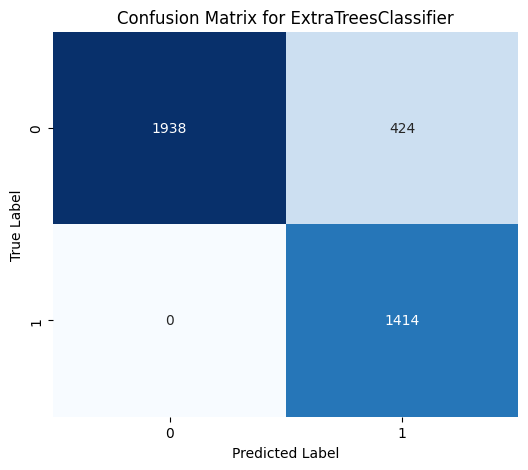

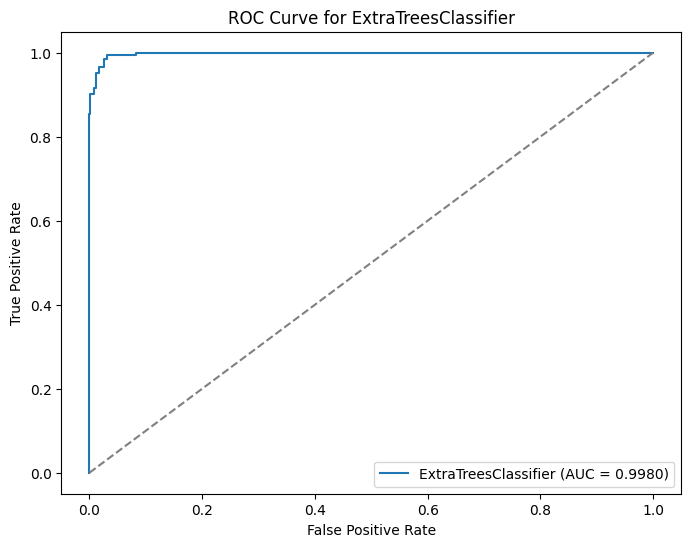

Accuracy for DecisionTreeClassifier on Test Set: 0.8657
Cohen's Kappa for DecisionTreeClassifier: 0.7303
MCC for DecisionTreeClassifier: 0.7512
Brier Score for DecisionTreeClassifier: 0.0723
AUC for DecisionTreeClassifier: 0.9643
Classification Report for DecisionTreeClassifier on Test Set:
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      2362
           1       0.74      0.98      0.84      1414

    accuracy                           0.87      3776
   macro avg       0.86      0.89      0.86      3776
weighted avg       0.89      0.87      0.87      3776



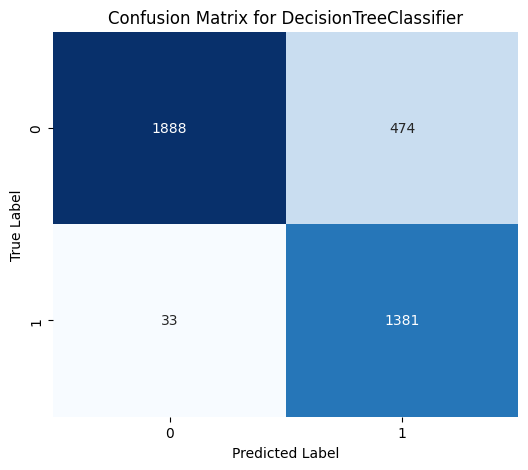

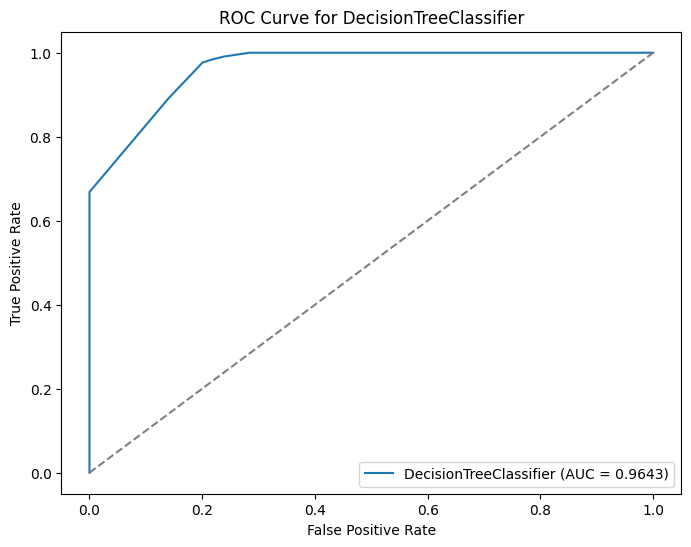

Accuracy for KNeighborsClassifier on Test Set: 0.9992
Cohen's Kappa for KNeighborsClassifier: 0.9983
MCC for KNeighborsClassifier: 0.9983
Brier Score for KNeighborsClassifier: 0.0008
AUC for KNeighborsClassifier: 0.9994
Classification Report for KNeighborsClassifier on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2362
           1       1.00      1.00      1.00      1414

    accuracy                           1.00      3776
   macro avg       1.00      1.00      1.00      3776
weighted avg       1.00      1.00      1.00      3776



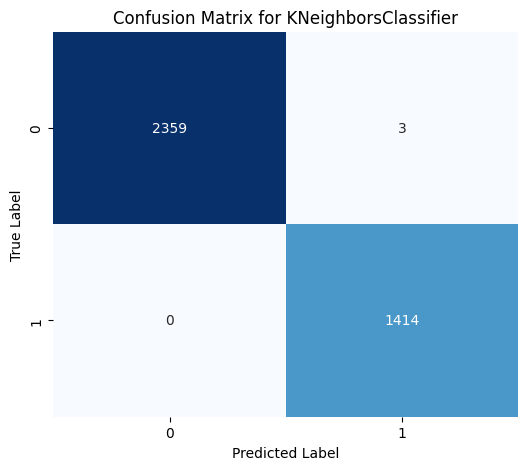

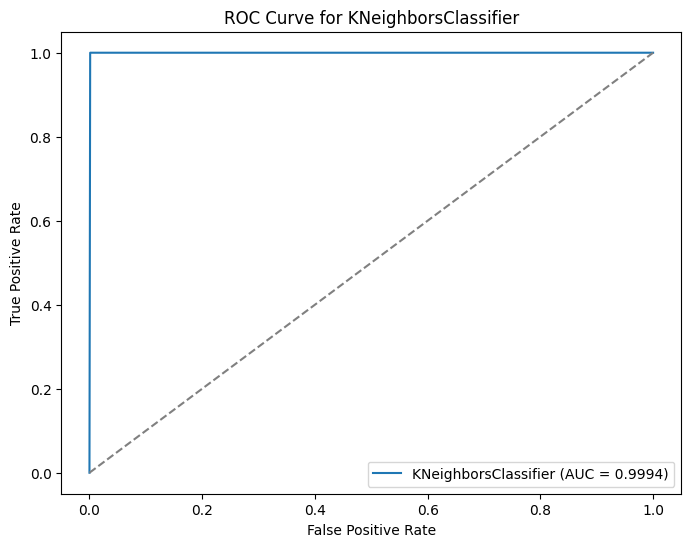

Accuracy for MLPClassifier on Test Set: 0.9992
Cohen's Kappa for MLPClassifier: 0.9983
MCC for MLPClassifier: 0.9983
Brier Score for MLPClassifier: 0.0009
AUC for MLPClassifier: 0.9992
Classification Report for MLPClassifier on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2362
           1       1.00      1.00      1.00      1414

    accuracy                           1.00      3776
   macro avg       1.00      1.00      1.00      3776
weighted avg       1.00      1.00      1.00      3776



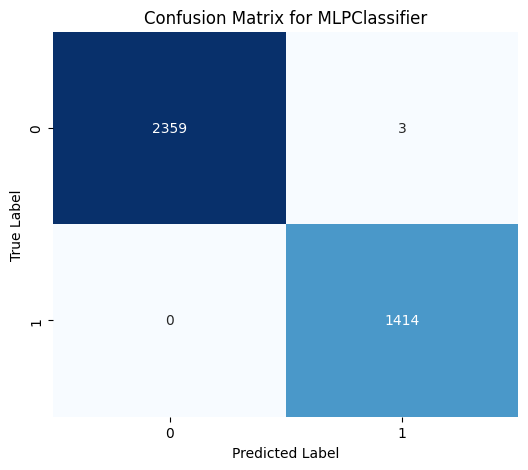

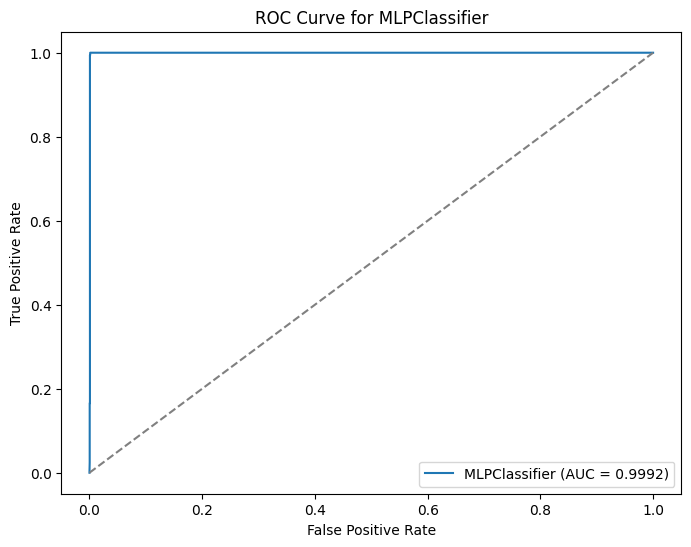

Accuracy for SVC on Test Set: 0.8769
Cohen's Kappa for SVC: 0.7512
MCC for SVC: 0.7690
Brier Score for SVC: 0.0897
AUC for SVC: 0.9278
Classification Report for SVC on Test Set:
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      2362
           1       0.76      0.98      0.86      1414

    accuracy                           0.88      3776
   macro avg       0.87      0.90      0.87      3776
weighted avg       0.90      0.88      0.88      3776



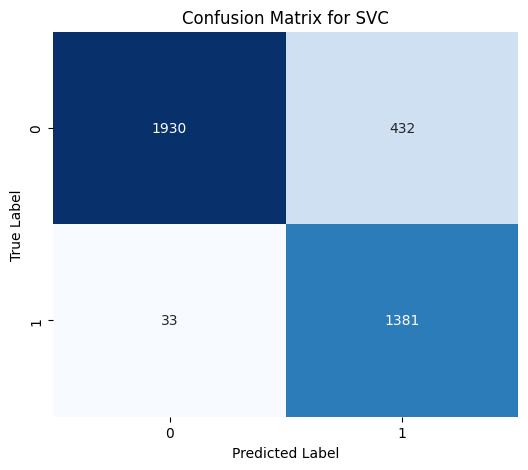

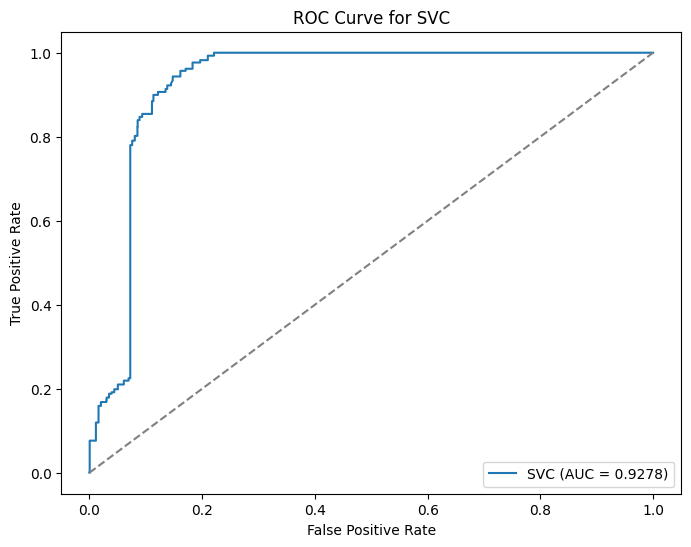

Accuracy for VotingClassifier on Test Set: 0.9963
Cohen's Kappa for VotingClassifier: 0.9921
MCC for VotingClassifier: 0.9921
Brier Score for VotingClassifier: 0.0276
AUC for VotingClassifier: 0.9998
Classification Report for VotingClassifier on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2362
           1       0.99      1.00      1.00      1414

    accuracy                           1.00      3776
   macro avg       1.00      1.00      1.00      3776
weighted avg       1.00      1.00      1.00      3776



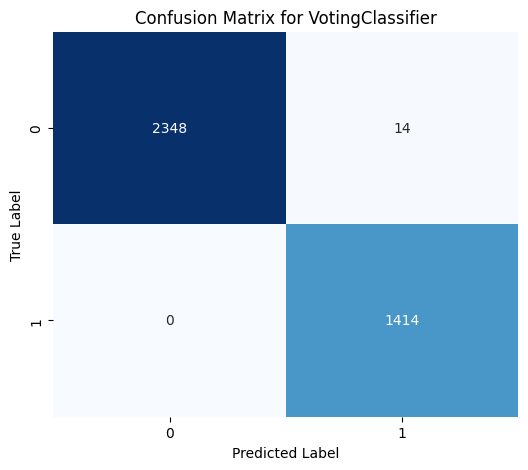

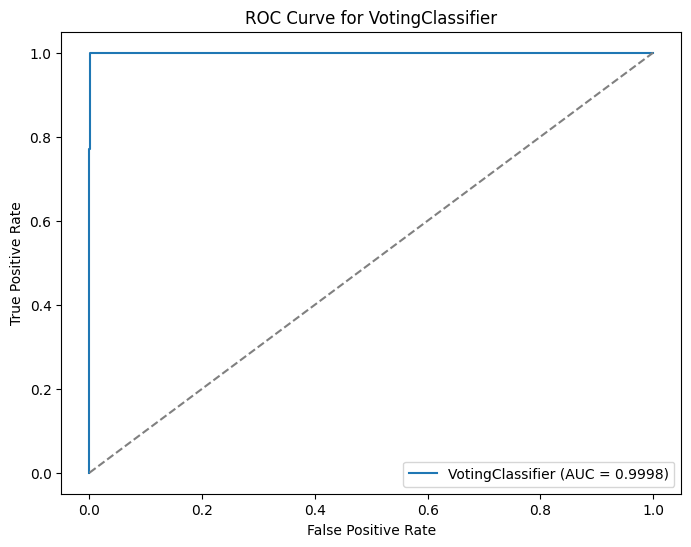

In [ ]:
import warnings
import time
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import (
    classification_report, accuracy_score, confusion_matrix,
    roc_curve, auc, cohen_kappa_score, matthews_corrcoef, brier_score_loss
)
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore', category=UserWarning, message='No further splits with positive gain')


X_test = test_df.drop(columns=['Result'])
y_test = test_df['Result']


models = [
    xgb.XGBClassifier(
        n_estimators=100,
        max_depth=5,
        learning_rate=0.1,
        objective='binary:logistic',
        random_state=42
    ),
    lgb.LGBMClassifier(
        n_estimators=100,
        max_depth=5,
        learning_rate=0.1,
        objective='binary',
        random_state=42,
        min_split_gain=0.01,
        feature_fraction=0.8,
        bagging_fraction=0.8,
        min_data_in_leaf=20
    ),
    RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=10,
        class_weight='balanced',
        random_state=42
    ),
    ExtraTreesClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=10,
        random_state=42
    ),
    DecisionTreeClassifier(
        max_depth=10,
        min_samples_split=10,
        random_state=42
    ),
    KNeighborsClassifier(n_neighbors=5),
    MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    SVC(
        probability=True,
        random_state=42,
        C=4,
        class_weight='balanced',
        kernel='rbf',
        gamma='scale'
    ),
    VotingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, class_weight='balanced', random_state=42)),
            ('knn', KNeighborsClassifier(n_neighbors=5)),
            ('svc', SVC(probability=True, random_state=42, C=4, class_weight='balanced', kernel='rbf', gamma='scale'))
        ],
        voting='soft'
    )
]


for model in models:
    try:
        model.fit(X_train_resampled, y_train_resampled)

      
        y_test_pred = model.predict(X_test)
        y_test_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

       
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_classification_report = classification_report(y_test, y_test_pred)
        cm = confusion_matrix(y_test, y_test_pred)
        fpr, tpr, _ = roc_curve(y_test, y_test_prob) if y_test_prob is not None else (None, None, None)
        auc_value = auc(fpr, tpr) if y_test_prob is not None else None

        kappa_score = cohen_kappa_score(y_test, y_test_pred)
        mcc_score = matthews_corrcoef(y_test, y_test_pred)
        brier_score = brier_score_loss(y_test, y_test_prob) if y_test_prob is not None else None

        
        print(f"Accuracy for {model.__class__.__name__} on Test Set: {test_accuracy:.4f}")
        print(f"Cohen's Kappa for {model.__class__.__name__}: {kappa_score:.4f}")
        print(f"MCC for {model.__class__.__name__}: {mcc_score:.4f}")
        if y_test_prob is not None:
            print(f"Brier Score for {model.__class__.__name__}: {brier_score:.4f}")
            print(f"AUC for {model.__class__.__name__}: {auc_value:.4f}")
        print(f"Classification Report for {model.__class__.__name__} on Test Set:")
        print(test_classification_report)
        print("=" * 80)

        
        plt.figure(figsize=(6, 5))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
        plt.title(f"Confusion Matrix for {model.__class__.__name__}")
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.show()

   
        if y_test_prob is not None:
            plt.figure(figsize=(8, 6))
            plt.plot(fpr, tpr, label=f"{model.__class__.__name__} (AUC = {auc_value:.4f})")
            plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.title(f"ROC Curve for {model.__class__.__name__}")
            plt.legend(loc="lower right")
            plt.show()

    except Exception as e:
        print(f"Error during testing {model.__class__.__name__}: {e}")
